<a href="https://colab.research.google.com/github/Alokik-29/first_model/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('fmnist_small.csv')

In [9]:


df.shape


(6000, 785)

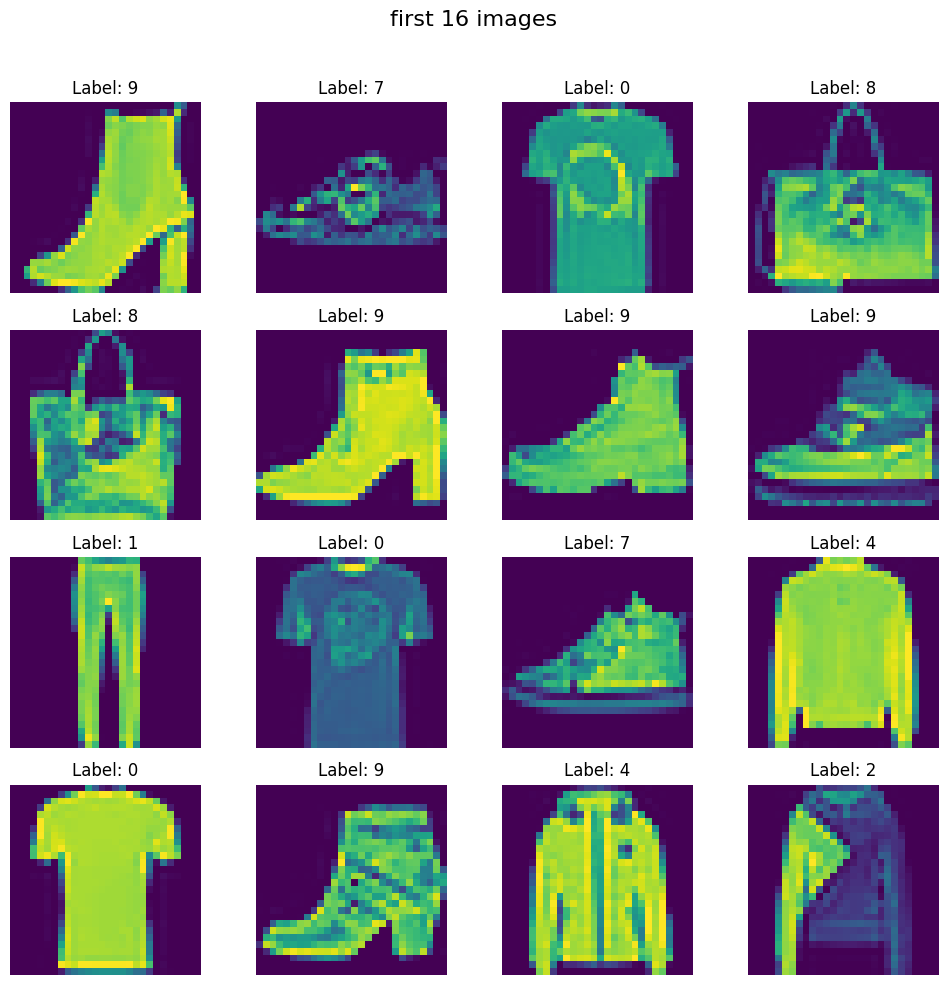

In [12]:
#create a 4*4 frid of image
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("first 16 images", fontsize=16)

#plot first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28, 28)
    ax.imshow(img) #display in greyscale
    ax.axis('off') #remove axis for thecleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}") #show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [16]:
# train test split

X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [24]:
#create customdataset class
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features=torch.tensor(features, dtype=torch.float32)
    self.labels=torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [25]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [47]:
train_dataset[0]


(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [48]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [49]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [51]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [61]:
# set learning rate and epochs
epochs = 150
learning_rate = 0.1

In [62]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [63]:
len(train_loader)

150

In [64]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.3492754884560902
Epoch: 2 , Loss: 0.7722881708542506
Epoch: 3 , Loss: 0.6692122448484102
Epoch: 4 , Loss: 0.5958303081989288
Epoch: 5 , Loss: 0.5539424273371697
Epoch: 6 , Loss: 0.5092016398906708
Epoch: 7 , Loss: 0.479299433529377
Epoch: 8 , Loss: 0.4603578753769398
Epoch: 9 , Loss: 0.4348719339072704
Epoch: 10 , Loss: 0.41483382413784664
Epoch: 11 , Loss: 0.3983226947983106
Epoch: 12 , Loss: 0.3751818319161733
Epoch: 13 , Loss: 0.3606247725089391
Epoch: 14 , Loss: 0.3459610973795255
Epoch: 15 , Loss: 0.32575696721673014
Epoch: 16 , Loss: 0.31914781759182614
Epoch: 17 , Loss: 0.30519966180125874
Epoch: 18 , Loss: 0.3050142713884513
Epoch: 19 , Loss: 0.2801434649527073
Epoch: 20 , Loss: 0.280939346080025
Epoch: 21 , Loss: 0.268757696946462
Epoch: 22 , Loss: 0.2581124785542488
Epoch: 23 , Loss: 0.25076643786082664
Epoch: 24 , Loss: 0.24163644075393675
Epoch: 25 , Loss: 0.22111667188505332
Epoch: 26 , Loss: 0.22740765129526455
Epoch: 27 , Loss: 0.21196703381836415
Epoc

In [65]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [66]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.835
